In [53]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy import stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn import preprocessing

In [54]:
data= pd.read_excel("C:\\Users\\win10\\Desktop\\Folds5x2_pp.xlsx",sheet_name="Sheet1")


In [55]:
# Q1 b(i)
rows_count=len(data)
columns_count=len(data.columns)
print("number of rows: ",rows_count,"\n","number of columns: ",columns_count)

# 9568 rows and 5 column
# The first four columns represent hourly average ambient features: Temperature (AT),Ambient Pressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V) 
# The last column represent the prediction of net hourly electrical energy output (PE) of the plant.
# Rows shows the vaules of each feature.

number of rows:  9568 
 number of columns:  5


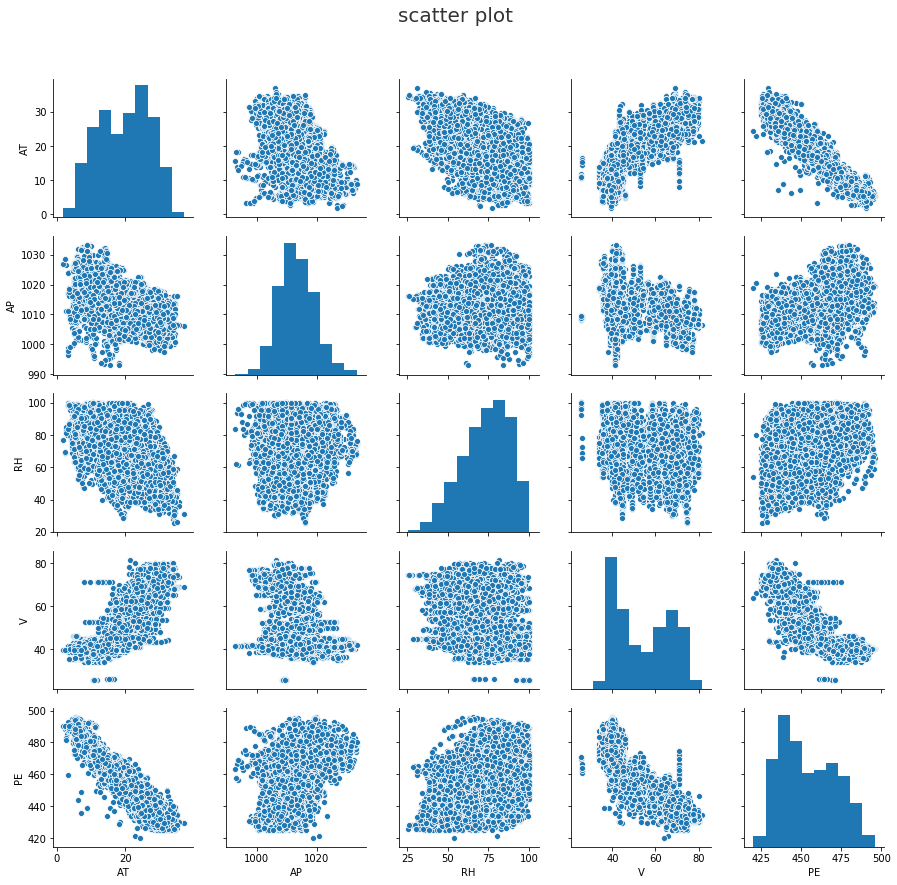

In [57]:
# Q1 b(ii)
data_scatterplot= sns.pairplot(data, vars=["AT", "AP","RH","V","PE"])
data_scatterplot.fig.suptitle("scatter plot",fontsize=20,alpha=0.8)
plt.subplots_adjust(top=0.9)

# negative correlation: AT & PE; V & PE
# positive correlation: AT & V, might be interaction 

In [58]:
# Q1 b(iii) the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset

In [59]:
sum_data=data.describe()
sum_data=sum_data.drop(["count","std"],axis=0)

In [60]:
Range=data.max()-data.min()

q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

In [61]:
df=pd.DataFrame([(Range[0],Range[1],Range[2],Range[3],Range[4]),(IQR[0],IQR[1],IQR[2],IQR[3],IQR[4])],
                index=["Range","IQR"],columns=("AT","V","AP","RH","PE"))

sum_data.append(df)

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
Range,35.300000,56.200000,40.410000,74.600000,75.500000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000


In [62]:
# Q1 c
from scipy import stats
import statsmodels.api as sm 

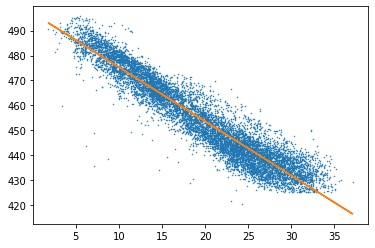

In [63]:
# Variable: AT
model_AT=sm.OLS.from_formula("PE~AT",data=data)
model_AT.fit()

PE=data["PE"]
AT=data["AT"]
# Simple Linear regression formula
# regr = intercept+ slope * x   
slope=stats.linregress(AT,PE)[0]
intercept=stats.linregress(AT,PE)[1]                            

regre_AT=intercept+slope*AT
plt.plot(AT, PE,'.', AT,regre_AT,markersize=1)
plt.show()

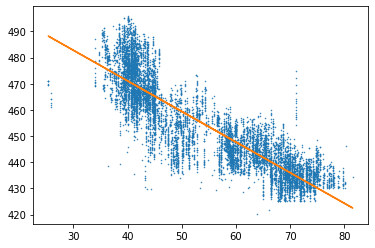

In [64]:
# Variable: V
model_V=sm.OLS.from_formula("PE~V",data=data)
model_V.fit()

PE=data["PE"]
V=data["V"]

slope=stats.linregress(V,PE)[0]
intercept=stats.linregress(V,PE)[1]                            
regre_V=intercept+slope*V
plt.plot(V, PE,'.', V,regre_V,markersize=1)
plt.show()

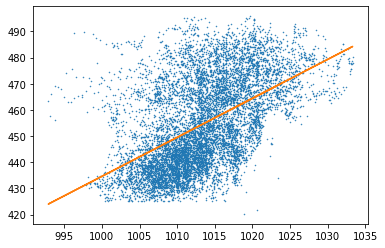

In [65]:
# Variable: AP
model_AP=sm.OLS.from_formula("PE~AP",data=data)
model_AP.fit()

PE=data["PE"]
AP=data["AP"]

slope=stats.linregress(AP,PE)[0]
intercept=stats.linregress(AP,PE)[1]                            
regre_AP=intercept+slope*AP
plt.plot(AP, PE,'.', AP,regre_AP,markersize=1)
plt.show()

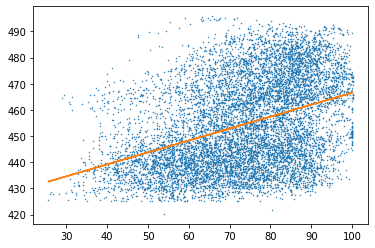

In [66]:
# Variable: RH
model_RH=sm.OLS.from_formula("PE~RH",data=data)
model_RH.fit()

PE=data["PE"]
RH=data["RH"]

slope=stats.linregress(RH,PE)[0]
intercept=stats.linregress(RH,PE)[1]                            
regre_RH=intercept+slope*RH
plt.plot(RH, PE,'.', RH,regre_RH,markersize=1)
plt.show()


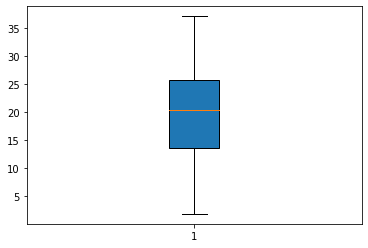

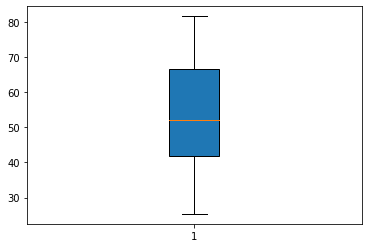

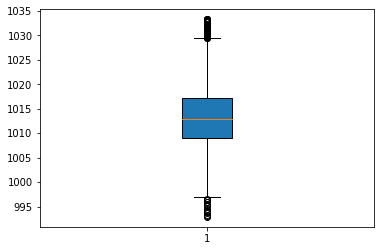

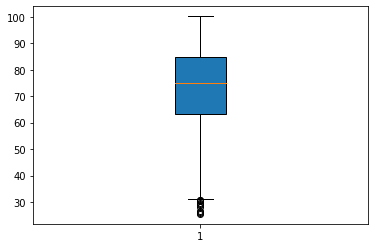

In [67]:
# Other plots to back up your assertions:box plot
plt.boxplot(AT,patch_artist=True)
plt.show()
plt.boxplot(V,patch_artist=True)
plt.show()
plt.boxplot(AP,patch_artist=True)
plt.show()
plt.boxplot(RH,patch_artist=True)
plt.show()

# Outliers appear in predictor Ambient Pressure(AP) and Relative Humidity(RH)

In [69]:
# Q1 d
# Fit a multiple regression model

multi_regre=sm.OLS.from_formula("PE~(AT+V+AP+RH)",data=data)
multi_regre.fit()
multi_regre.fit().summary()

# R-squared shows how well the regression model fits the observed data. 
# In this multiple regression model, R-squared= 0.929, meaning that 92.9% of the data fit the regression model. 
# Hence, it implies well-fitted.
# P-value is smaller than 0.05,even close to 0, so we can reject the null hypothsis (H0 : beta_j= 0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:01:41   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

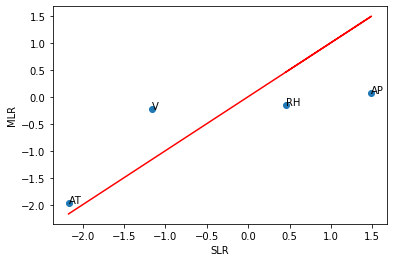

In [70]:
# Q1 e 
# coefficient(simple linear regression model):x-axis
# coefficient (multiple linear regression model): y-axis
plt.xlabel("SLR")
plt.ylabel("MLR")

x = [-2.1713,-1.1681,1.4899,0.4557]
y = [ -1.9775, -0.2339 , 0.0621,-0.1581]

# From the summary board computed above,we have already know the value of coefficients
plt.scatter(x, y)
plt.plot(x,x,"r")

plt.text(-2.1713, -1.9775,"AT")
plt.text(-1.1681,-0.2339,"V")
plt.text(1.4899, 0.0621,"AP")
plt.text(0.4557,-0.1581,"RH")

plt.show()

In [71]:
# Q1 f
# Y = β_0 + β_1*x + β_2x^2 + β_3*x^3 + error

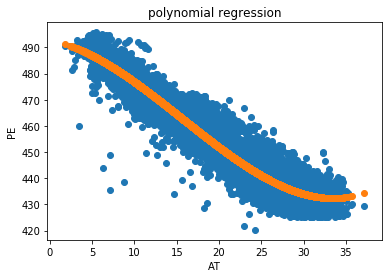

In [72]:
# Variable:AT
x_AT= data.iloc[:,0].to_frame()
y_PE= data.iloc[:,4].to_frame()

x_AT = x_AT.values.reshape(-1,1)
y_PE = y_PE.values.reshape(-1,1)

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_AT)
poly.fit(x_poly, y_PE)
poly_reg = LinearRegression().fit(x_poly, y_PE)
y_pred = poly_reg.predict(poly.fit_transform(x_AT))
plt.scatter(x_AT, y_PE)
plt.scatter(x_AT ,y_pred)
plt.title("polynomial regression")
plt.xlabel("AT")
plt.ylabel("PE")
plt.show()

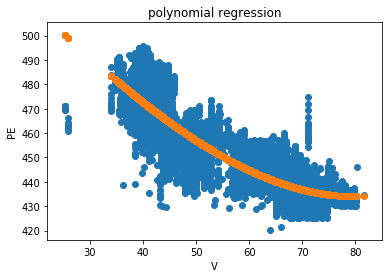

In [73]:

x_V=data.iloc[:,1].to_frame()
y_PE= data.iloc[:,4].to_frame()

x_V = x_V.values.reshape(-1,1)
y_PE = y_PE.values.reshape(-1,1)


poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_V)
poly.fit(x_poly, y_PE)
poly_reg = LinearRegression().fit(x_poly, y_PE)
y_pred = poly_reg.predict(poly.fit_transform(x_V))
plt.scatter(x_V, y_PE)
plt.scatter(x_V ,y_pred)
plt.title("polynomial regression")
plt.xlabel("V")
plt.ylabel("PE")
plt.show()

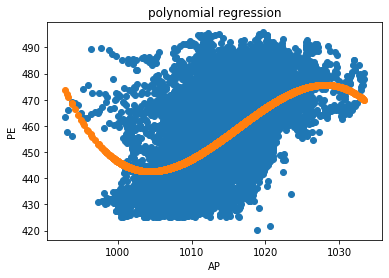

In [74]:

x_AP=data.iloc[:,2].to_frame()
y_PE= data.iloc[:,4].to_frame()
x_AP = x_AP.values.reshape(-1,1)
y_PE = y_PE.values.reshape(-1,1)


poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_AP)
poly.fit(x_poly, y_PE)
poly_reg = LinearRegression().fit(x_poly, y_PE)
y_pred = poly_reg.predict(poly.fit_transform(x_AP))
plt.scatter(x_AP, y_PE)
plt.scatter(x_AP,y_pred)
plt.title("polynomial regression")
plt.xlabel("AP")
plt.ylabel("PE")
plt.show()

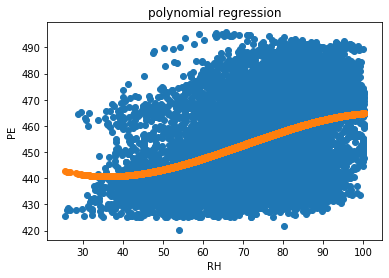

In [75]:

x_RH=data.iloc[:,3].to_frame()
y_PE= data.iloc[:,4].to_frame()
x_RH = x_RH.values.reshape(-1,1)
y_PE = y_PE.values.reshape(-1,1)


poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_RH)
poly.fit(x_poly, y_PE)
poly_reg = LinearRegression().fit(x_poly, y_PE)
y_pred = poly_reg.predict(poly.fit_transform(x_RH))
plt.scatter(x_RH, y_PE)
plt.scatter(x_RH,y_pred)
plt.title("polynomial regression")
plt.xlabel("RH")
plt.ylabel("PE")
plt.show()

In [76]:
# Q1 f
xData = data.loc[:, ['AT', 'V', 'AP', 'RH']]
yData = data.loc[:, ['PE']]

# linear regression with interaction
poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = True)
xData_new = poly.fit_transform(xData)

sm.add_constant(xData_new)
OLSmodels = sm.OLS(yData, xData_new)

OLSresults = OLSmodels.fit()
print(OLSresults.summary())
# Several interaction variable is not signifiant

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:02:00   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

In [77]:
# Q1 h
# 70% train data
# 30% test data
x_ori = data.loc[:, ["AT", "V", "AP","RH"]]
y_ori = data.loc[:, ["PE"]]

x_train, x_test, y_train, y_test = train_test_split(x_ori, y_ori, test_size = 0.3)


In [78]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()# OLS

trainPredict = model.predict(x_train)
trainMSE = mean_squared_error(y_train, trainPredict)
print("Trained:", trainMSE)

Trained: 20.6845917256724


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [79]:
x_test = sm.add_constant(x_test)
testPredict = model.predict(x_test) #OLS
testMSE = mean_squared_error(y_test, testPredict)
print("Tested:", testMSE)

Tested: 20.98168781790592


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [80]:
regression = smf.ols(formula ="PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2) + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH",data = pd.concat([x_train, pd.DataFrame(y_train)],axis = 1))
model = regression.fit()

trainPredict = model.predict(sm.add_constant(x_train))
testPredict = model.predict(sm.add_constant(x_test))
trainMSE = mean_squared_error(y_train, trainPredict)
testMSE = mean_squared_error(y_test, testPredict)
print("Trained MSE:",trainMSE)
print("Tested MSE:",testMSE)
print(model.pvalues)

Trained MSE: 18.13340191489773
Tested MSE: 18.064118753565023
Intercept     7.482731e-07
AT            1.674504e-01
V             1.574969e-01
AP            1.009210e-07
RH            2.630032e-04
I(AT ** 2)    1.958180e-04
I(V ** 2)     8.315431e-02
I(AP ** 2)    9.154927e-08
I(RH ** 2)    3.533340e-11
AT:V          9.695449e-05
AT:AP         4.663450e-01
AT:RH         4.234514e-05
V:AP          2.324208e-01
V:RH          2.500931e-01
AP:RH         5.395977e-04
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [81]:
regression = smf.ols(formula = "PE ~ AT + V + AP + RH + I(AT**2) + I(AP**2) + I(RH**2) + AT:V + AT:RH + AP:RH", 
                     data = pd.concat([x_train, pd.DataFrame(y_train)],axis = 1))
model_remove = regression.fit()

trainPredict = model_remove.predict(sm.add_constant(x_train))
testPredict = model_remove.predict(sm.add_constant(x_test))
trainMSE = mean_squared_error(y_train, trainPredict)
testMSE = mean_squared_error(y_test, testPredict)

print("After removal:",trainMSE)
print("After remoal:",testMSE)
print(model_remove.pvalues)

After removal: 18.16477530774896
After remoal: 18.11334509227534
Intercept      2.275284e-18
AT            1.267470e-111
V              3.634864e-40
AP             2.739890e-19
RH             5.634319e-12
I(AT ** 2)     1.772141e-13
I(AP ** 2)     2.141958e-18
I(RH ** 2)     2.557944e-14
AT:V           1.836133e-06
AT:RH          7.029958e-16
AP:RH          3.825472e-11
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [82]:
# Q1 i 
dfTrain =pd.DataFrame({"k":[], "trainMSE":[]})
dfTest = pd.DataFrame({"k":[], "testMSE":[]})

for k in range(1,101,1):
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    trainPredict = model.predict(x_train)
    trainMSE = mean_squared_error(y_train, trainPredict)    
    dfTrain = dfTrain.append({"k":k, "trainMSE":trainMSE}, ignore_index=True)
     
    testPredict = model.predict(x_test)
    testMSE = mean_squared_error(y_test, testPredict)
    dfTest = dfTest.append({"k":k, "testMSE":testMSE}, ignore_index=True)
    
    
bestTrainMSE=min(dfTrain["trainMSE"])
bestTrainK=list(dfTrain["trainMSE"]).index(min(dfTrain["trainMSE"]))+1


bestTestMSE=min(dfTest["testMSE"])
bestTestK=list(dfTest["testMSE"]).index(min(dfTest["testMSE"]))+1

print("best train K:", bestTrainK,"best train MSE : ", bestTrainMSE)
print("best test K:", bestTestK, "best test MSE: ", bestTestMSE)

best train K: 1 best train MSE :  0.0
best test K: 5 best test MSE:  15.420502087077677


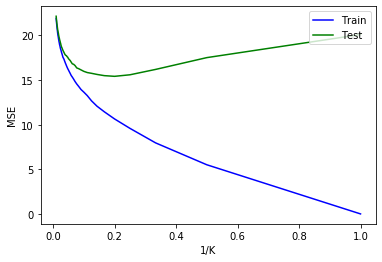

In [83]:
ax = plt.gca()
ax.set_xlabel("1/K")
ax.set_ylabel("MSE")
dfTrain["k"] = 1/dfTrain["k"]
dfTest["k"] = 1/dfTest["k"]
ax.plot(dfTrain["k"], dfTrain["trainMSE"], label = "Train", color="blue")
ax.plot(dfTest["k"], dfTest['testMSE'], label = "Test", color="green")
plt.legend(loc="upper right") 

In [84]:
#Normalized,similar to the above

x_norm_train = preprocessing.scale(x_train)
x_norm_test = preprocessing.scale(x_test)

dfTrain =pd.DataFrame({"k":[], "trainMSE":[]})
dfTest = pd.DataFrame({"k":[], "testMSE":[]})

for k in range(1,101,1):
    norm_model = neighbors.KNeighborsRegressor(n_neighbors=k)
    norm_model.fit(x_norm_train, y_train)
    
    norm_trainPredict =norm_model.predict(x_norm_train)
    trainMSE = mean_squared_error(y_train, norm_trainPredict)    
    dfTrain = dfTrain.append({"k":k, "trainMSE":trainMSE}, ignore_index=True)
     
    testPredict = norm_model.predict(x_norm_test)
    testMSE = mean_squared_error(y_test, testPredict)
    dfTest = dfTest.append({"k":k, "testMSE":testMSE}, ignore_index=True)
    


bestTrainMSE=min(dfTrain["trainMSE"])
bestTrainK=list(dfTrain["trainMSE"]).index(min(dfTrain["trainMSE"]))+1
bestTestMSE=min(dfTest["testMSE"])
bestTestK=list(dfTest["testMSE"]).index(min(dfTest["testMSE"]))+1
print("best train K_normalized: ", bestTrainK," best train MSE_normalized feature is: ", bestTrainMSE)
print("best test K_normalized: ", bestTestK, " best test MSE_normalized feature is: ", bestTestMSE)

best train K_normalized:  1  best train MSE_normalized feature is:  0.0
best test K_normalized:  4  best test MSE_normalized feature is:  14.940660714907697


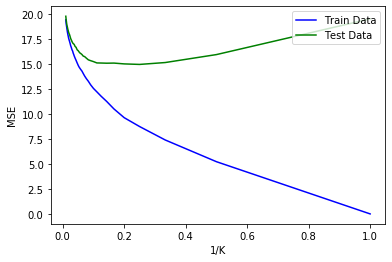

In [85]:
ax = plt.gca()
ax.set_xlabel("1/K")
ax.set_ylabel("MSE")
dfTrain["k"] = 1/dfTrain["k"]
dfTest["k"] = 1/dfTest['k']
ax.plot(dfTrain["k"], dfTrain["trainMSE"], label = "Train Data", color="blue")
ax.plot(dfTest["k"], dfTest["testMSE"], label = "Test Data", color="green")
plt.legend(loc="upper right")   

In [86]:
# Q1 j
# Compared with Linear Regression model,normalized KNN has the smllest test error.

In [87]:
# Q2 ISLR: 2.4.1
#(a) The sample size n is extremely large, and the number of predictors p is small.
# Answer: Better. As n becomes larger, the risk of overfitting is lowered.
#(b) The number of predictors p is extremely large, and the number of observations n is small.
# Answer: Worse. Because p is large, overfitting situations becomes common, the model is more likely to include noise.
#(c) The relationship between the predictors and response is highly non-linear.
# Answer: Better. Flexible model perform better. 
#(d) The variance of the error terms is extremely high.
# Answer: Worse. If Var() is too high, flexible model is more likely to be overfitting and include the noise.

In [88]:
# Q3 ISLR: 2.4.7
#(a) Eucliean distance= sqrt[(x2-x1)^2+(y2-y1)^2]
# ED_1=sqrt(3^2)=3
# ED_2=sqrt(2^2)=2
# ED_3=sqrt(1^2+3^2)=sqrt(10)=3.162
# ED_4=sqrt(1^2+2^2)=sqrt(5)=2.236
# ED_5=sqrt(1^2+1^2)=sqrt(2)=1.414
# ED_6=sqrt(1^2+1^2+1^2)=sqrt(3)=1.732


In [89]:
# (b) K=1, the nearest point is OBS_5,and the corresponding prediction is GREEN
# (c) K=3, the nearest three points are OBS_2,OBS_5,OBS_6, and 2 out 3 are RED, hence the prediction is RED.
# (d) Small. In non-linear case, a smaller K will make it easy for data pluged.